<a href="https://colab.research.google.com/github/rebelahsan/Mo-Ahsan-Ahmad/blob/main/Updated_Final_colab_Pro23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install plotly

In [17]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from collections import Counter
import lightgbm as lgb

In [3]:
pip install scikit-learn

In [18]:
import warnings
warnings.filterwarnings(action='once')
from sklearn.model_selection import train_test_split

In [5]:
import gc
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [6]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:85: ResourceWarning:

unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.10/dist-packages/catboost-1.2.2.dist-info/top_level.txt' mode='r' encoding='UTF-8'>



In [7]:
df = pd.read_csv('/content/creditcard.csv')

In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
df.shape

(284807, 31)

In [11]:
df.shape

(284807, 31)

In [ ]:
#df=df.sample(n=175000, random_state=42)

In [ ]:
#N=284807
#n=175000

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
df.columns # or df.columns.values

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [19]:
## Transactions in time

class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]
hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Transactions Time Density Plot', xaxis=dict(title='Time [seconds]'))
iplot(fig, filename='dist_only')


In [ ]:
#df.shape

In [20]:
X = df.drop(['Class'], axis=1)
y= df['Class']
X.shape, y.shape

((284807, 30), (284807,))

In [21]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [22]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [23]:
df = df.copy()

In [24]:
df['Class'] = df['Class'].replace({0.0: 0, 1.0: 1})

In [25]:
X = df.drop(['Class'], axis=1)
y= df['Class']
X.shape, y.shape

((284807, 30), (284807,))

In [26]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

<frozen importlib._bootstrap>:914: ImportWarning:

APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDrive2ImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDriveImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_OpenCVImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_BokehImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_AltairImportHook.find_spec() not found; falling back to find_module()



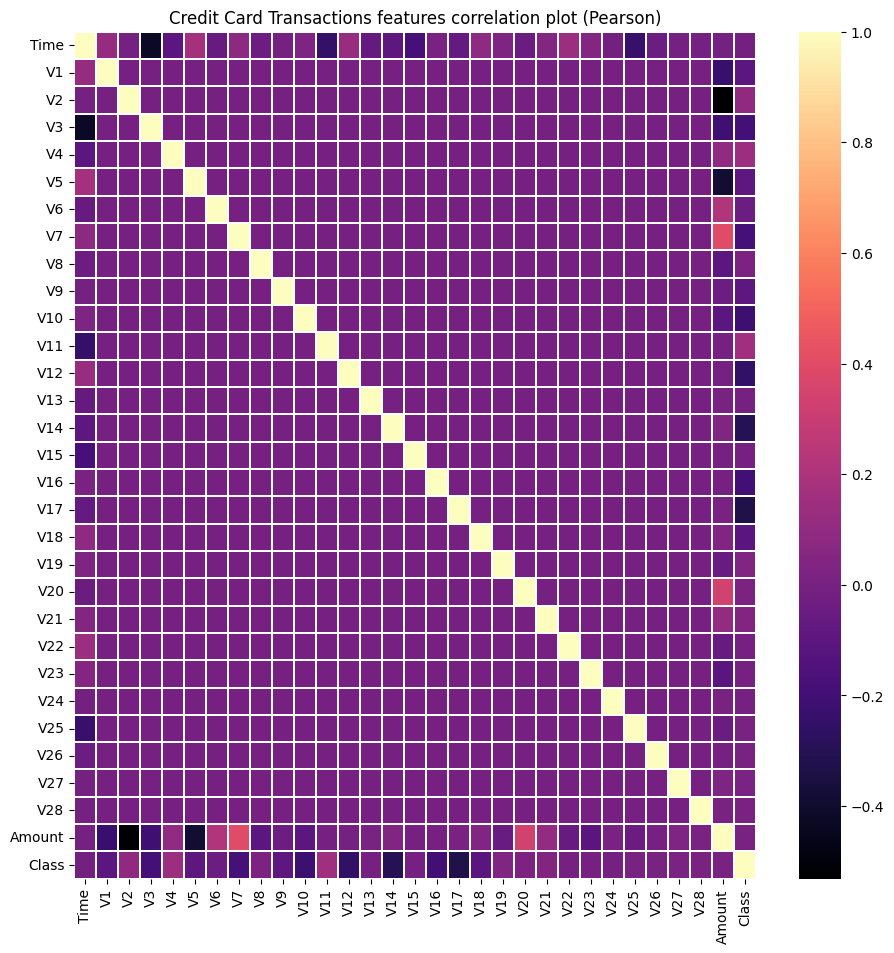

In [27]:
plt.figure(figsize = (11,11))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.3 , cmap="magma")
plt.show()

In [28]:
X = df.drop(['Class'], axis=1)
y= df['Class']
X.shape, y.shape

((284807, 30), (284807,))

In [29]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [30]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


## First we scale the data

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

In [32]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [33]:
y.value_counts() # Highly Imbalanced data

0    284315
1       492
Name: Class, dtype: int64

In [34]:
# 2nd method for Checking missing values 1st method
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
pd.concat([total,percent], axis=1, keys=['total','percent']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,...,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Highly Imbalanced Data

<Axes: ylabel='Class'>

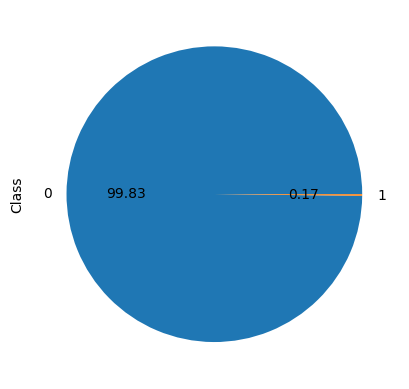

In [36]:
y.value_counts().plot.pie(autopct='%.2f')

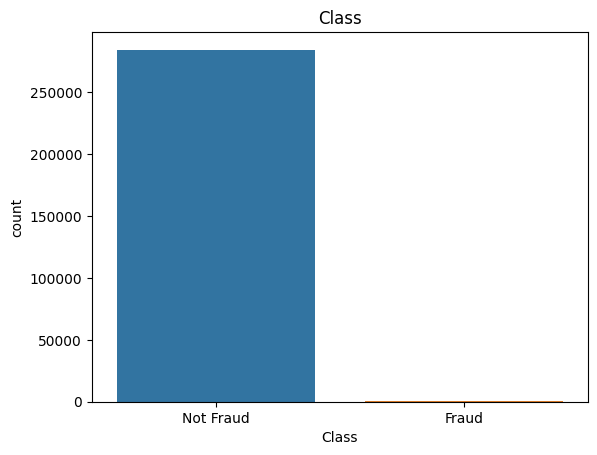

In [37]:
df = sns.countplot(x=y)
plt.title('Class')

df.set_xticklabels(['Not Fraud','Fraud'])
plt.show()

In [38]:
from sklearn.metrics import roc_curve, auc

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
print("Train shape: ", X_train.shape, y_train.shape)
print("Test shape: ", X_test.shape, y_test.shape)

Train shape:  (199364, 30) (199364,)
Test shape:  (85443, 30) (85443,)


### Feature Selection

In [41]:
#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

In [42]:
#split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Train shape: ", X_train.shape, y_train.shape)
print("Test shape: ", X_test.shape, y_test.shape)

Train shape:  (199364, 30) (199364,)
Test shape:  (85443, 30) (85443,)


In [47]:
# f_reg() selecting the top k most relevant features(largest values) via the SelectKBest class
fs = SelectKBest(score_func=f_regression, k= 10)
#relationship from training data
fs.fit(X_train , y_train)

SelectKBest(score_func=<function f_regression at 0x7ad2b83c72e0>)

In [48]:
#transform train input data
X_train = fs.transform(X_train)
#transform test input data
X_test = fs.transform(X_test)
print(X_train, X_test, fs)

[[ 0.53993988 -1.20521505  0.76311785 ... -1.02290138 -0.3519186
  -0.73187177]
 [-2.241345    0.49723011  1.25428884 ... -0.58022646  0.08538414
  -1.07921077]
 [ 1.49393715 -0.67825472 -1.14557097 ... -1.48020097  1.14024221
   2.46132456]
 ...
 [ 1.00549976  0.34309295  0.87029986 ... -0.16522373 -0.6356582
  -0.08157606]
 [-1.66278464 -2.68309655 -0.3813534  ...  0.48629045 -0.4664205
  -1.12964149]
 [ 0.25509202 -0.4933791  -0.40608884 ...  1.65230248 -0.04776132
  -1.56771726]] [[-1.22999666e+01  6.71362468e+00 -1.35007760e+01 ... -1.12972682e+01
  -2.26486362e+01 -1.00200491e+01]
 [-8.84216348e-02 -9.78714950e-01 -4.23880601e-01 ... -2.44552216e+00
   1.49476919e-01  2.09104549e+00]
 [ 1.11207703e-01 -7.27434842e-01 -5.76001641e-01 ...  2.01980863e+00
  -6.27752170e-01 -6.36263913e-01]
 ...
 [ 7.43829270e-01  1.15224064e+00 -6.93014576e-01 ... -1.43919336e-01
   2.44749769e-01  1.55383413e-02]
 [-1.13576558e+00  2.84859397e-01  1.54154056e-01 ...  3.72889691e-01
   5.27223509e-0

## SelectKbase randomly selected most best features for optimal accuracy

In [49]:
X_train.shape, X_test.shape

((199364, 10), (85443, 10))

### X_train_fs and y_train_fs are the new variables after feature selection

In [50]:
X_train_fs, y_train_fs = X_train, y_train

In [51]:
y_train_fs.value_counts()

0    199008
1       356
Name: Class, dtype: int64

In [52]:
y_train_fs.shape

(199364,)

In [53]:
X_train_fs.shape, X_test.shape

((199364, 10), (85443, 10))

In [54]:
y_test.shape

(85443,)

In [55]:
from collections import Counter
Counter(y_train_fs)

Counter({0: 199008, 1: 356})

In [56]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,f1_score,recall_score,precision_score, log_loss

In [57]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [58]:
def models(X_train, y_train):

    # Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(random_state=0, criterion="entropy")
    tree.fit(X_train_fs, y_train_fs)

    # Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(random_state=0, criterion="entropy", n_estimators=10)
    forest.fit(X_train_fs, y_train_fs)

    # Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(X_train_fs, y_train_fs)

    print('[0] DT Accuracy: ', tree.score(X_train, y_train))
    print('[1] RF Accuracy: ', forest.score(X_train, y_train))
    print('[2] NB Accuracy: ', gnb.score(X_train, y_train))
    return tree, forest,gnb

def plot_roc_curve(models, X_test, y_test):
    # Binarize the output
    y_test_bin = label_binarize(y_test, classes=[0, 1])

    # Plot ROC curve for each model
    plt.figure(figsize=(8, 8))
    for i, model in enumerate(models):
        y_score = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test_bin, y_score)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=2, label=f'Model {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('ROC Curve Without Sampling')
    plt.legend(loc='lower right')
    plt.show()

# Train models
models = models(X_train, y_train)

# Plot ROC curves
#plot_roc_curve(models, X_test, y_test)


<frozen importlib._bootstrap>:914: ImportWarning:

APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDrive2ImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDriveImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_OpenCVImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_BokehImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_AltairImportHook.find_spec() not found; falling back to find_module()



[0] DT Accuracy:  1.0
[1] RF Accuracy:  0.9999398085913204
[2] NB Accuracy:  0.9905800445416424



Model 0

Confu. Matrix:
 [[85262    45]
 [   26   110]]

Acc. Score:  0.99916903666772

Class. Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.71      0.81      0.76       136

    accuracy                           1.00     85443
   macro avg       0.85      0.90      0.88     85443
weighted avg       1.00      1.00      1.00     85443


Precision score:  0.7096774193548387
Recall score: 0.8088235294117647
f1_score:  0.7560137457044674
log_loss:  0.029950954327766312

Model 1

Confu. Matrix:
 [[85300     7]
 [   25   111]]

Acc. Score:  0.9996254813150287

Class. Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.94      0.82      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443


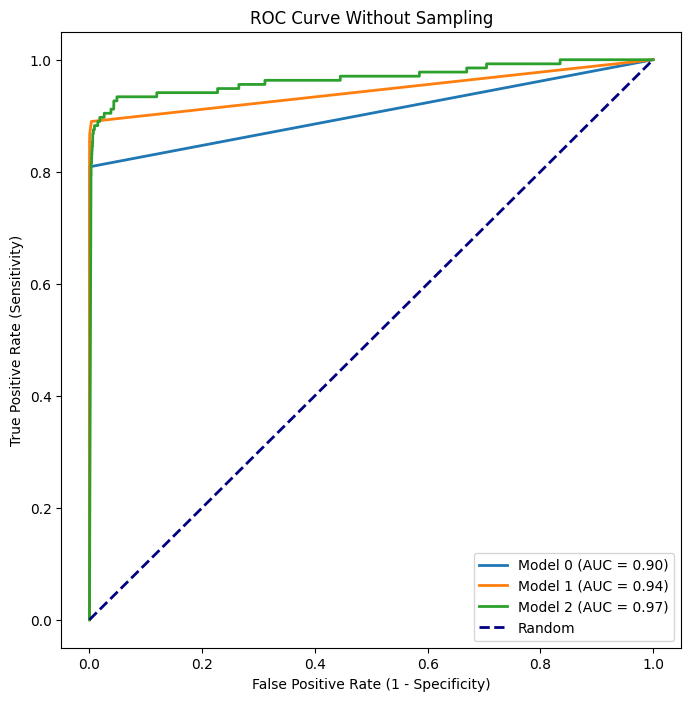

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score, log_loss

# Testing the Results
for i, model in enumerate(models):
    print("\nModel", i)
    y_pred = model.predict(X_test)

    print('\nConfu. Matrix:\n', confusion_matrix(y_test, y_pred))
    print('\nAcc. Score: ', accuracy_score(y_test, y_pred))
    print('\nClass. Report: \n', classification_report(y_test, y_pred))
    print('\nPrecision score: ', precision_score(y_test, y_pred))
    print('Recall score:', recall_score(y_test, y_pred))
    print('f1_score: ', f1_score(y_test, y_pred))
    print('log_loss: ', log_loss(y_test, y_pred))

# Plot ROC curves
plot_roc_curve(models, X_test, y_test)


## Testing all Models with Cross_Validation Techniques (without Sampling)

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

[0] DT Cross-Validation AUC: 0.870532758211064
[1] RF Cross-Validation AUC: 0.9153819800141285
[2] NB Cross-Validation AUC: 0.967420498368537


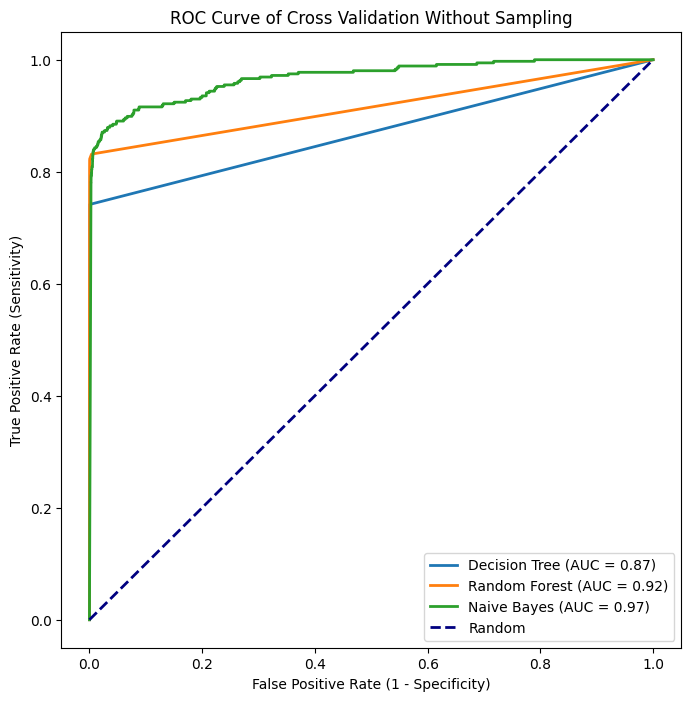

In [61]:
def models_with_crossvalidation_roc(X_train, y_train):
    # Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(random_state=0, criterion="entropy")
    tree_scores = cross_val_score(tree, X_train, y_train, cv=10)  # 10-fold cross-validation
    y_tree_scores = cross_val_predict(tree, X_train, y_train, cv=10, method='predict_proba')
    fpr_tree, tpr_tree, _ = roc_curve(y_train, y_tree_scores[:, 1])
    roc_auc_tree = auc(fpr_tree, tpr_tree)
    print('[0] DT Cross-Validation AUC:', roc_auc_tree)

    # Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(random_state=0, criterion="entropy", n_estimators=10)
    forest_scores = cross_val_score(forest, X_train, y_train, cv=10)  # 10-fold cross-validation
    y_forest_scores = cross_val_predict(forest, X_train, y_train, cv=10, method='predict_proba')
    fpr_forest, tpr_forest, _ = roc_curve(y_train, y_forest_scores[:, 1])
    roc_auc_forest = auc(fpr_forest, tpr_forest)
    print('[1] RF Cross-Validation AUC:', roc_auc_forest)

    # Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb_scores = cross_val_score(gnb, X_train, y_train, cv=10)  # 10-fold cross-validation
    y_gnb_scores = cross_val_predict(gnb, X_train, y_train, cv=10, method='predict_proba')
    fpr_gnb, tpr_gnb, _ = roc_curve(y_train, y_gnb_scores[:, 1])
    roc_auc_gnb = auc(fpr_gnb, tpr_gnb)
    print('[2] NB Cross-Validation AUC:', roc_auc_gnb)

    return tree, forest, gnb, fpr_tree, tpr_tree, roc_auc_tree, fpr_forest, tpr_forest, roc_auc_forest, fpr_gnb, tpr_gnb, roc_auc_gnb

# Train models with cross-validation and ROC curve analysis
tree, forest, gnb, fpr_tree, tpr_tree, roc_auc_tree, fpr_forest, tpr_forest, roc_auc_forest, fpr_gnb, tpr_gnb, roc_auc_gnb, = models_with_crossvalidation_roc(X_train, y_train)

# Plot ROC curves
plt.figure(figsize=(8, 8))
plt.plot(fpr_tree, tpr_tree, lw=2, label=f'Decision Tree (AUC = {roc_auc_tree:.2f})')
plt.plot(fpr_forest, tpr_forest, lw=2, label=f'Random Forest (AUC = {roc_auc_forest:.2f})')
plt.plot(fpr_gnb, tpr_gnb, lw=2, label=f'Naive Bayes (AUC = {roc_auc_gnb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve of Cross Validation Without Sampling')
plt.legend(loc='lower right')
plt.show()


In [ ]:
X_train_fs.shape, y_train_fs.shape

((199364, 10), (199364,))

In [ ]:
X_train.shape, y_train.shape

((199364, 10), (199364,))

In [62]:
pip install imbalanced-learn

# Sampling Techniques to Balance Data

### 1. Random Under Sampling

In [64]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

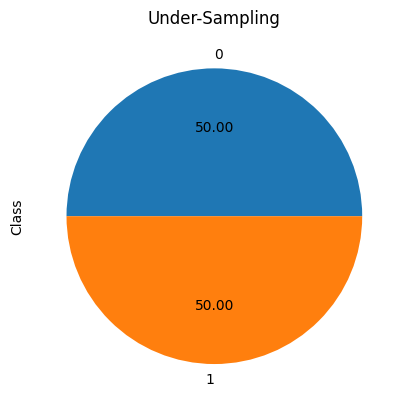

In [65]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='auto') # float
X_rus, y_rus = rus.fit_resample(X_train_fs,y_train_fs)
ax = y_rus.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-Sampling")

In [66]:
y_rus.value_counts()

0    356
1    356
Name: Class, dtype: int64

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_rus,y_rus, test_size=0.3, random_state=42)
print("Train shape: ", X_train.shape, y_train.shape)
print("Test shape: ", X_test.shape, y_test.shape)

Train shape:  (498, 10) (498,)
Test shape:  (214, 10) (214,)


In [ ]:
# 356+356=712 and 498+214=712  correct

In [68]:
def models(X_train, y_train):

    # Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(random_state=0, criterion="entropy")
    tree.fit(X_train, y_train)

    # Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(random_state=0, criterion="entropy", n_estimators=10)
    forest.fit(X_train, y_train)

    # Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)


    print('[0] DT Accuracy: ', tree.score(X_train, y_train))
    print('[1] RF Accuracy: ', forest.score(X_train, y_train))
    print('[2] NB Accuracy: ', gnb.score(X_train, y_train))
    return tree, forest,gnb

def plot_roc_curve(models, X_test, y_test):
    # Binarize the output
    y_test_bin = label_binarize(y_test, classes=[0, 1])

    # Plot ROC curve for each model
    plt.figure(figsize=(8, 8))
    for i, model in enumerate(models):
        y_score = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test_bin, y_score)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=2, label=f'Model {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('ROC Curve With Under Sampling')
    plt.legend(loc='lower right')
    plt.show()

# Train models
models = models(X_train, y_train)

# Plot ROC curves
#plot_roc_curve(models, X_test, y_test)


[0] DT Accuracy:  1.0
[1] RF Accuracy:  0.9959839357429718
[2] NB Accuracy:  0.9016064257028112


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




Model 0

Confu. Matrix:
 [[111   8]
 [ 10  85]]

Acc. Score:  0.9158878504672897

Class. Report: 
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       119
           1       0.91      0.89      0.90        95

    accuracy                           0.92       214
   macro avg       0.92      0.91      0.91       214
weighted avg       0.92      0.92      0.92       214


Precision score:  0.9139784946236559
Recall score: 0.8947368421052632
f1_score:  0.9042553191489361
log_loss:  3.0317091635706017

Model 1

Confu. Matrix:
 [[118   1]
 [ 10  85]]

Acc. Score:  0.9485981308411215

Class. Report: 
               precision    recall  f1-score   support

           0       0.92      0.99      0.96       119
           1       0.99      0.89      0.94        95

    accuracy                           0.95       214
   macro avg       0.96      0.94      0.95       214
weighted avg       0.95      0.95      0.95       214


Precision scor

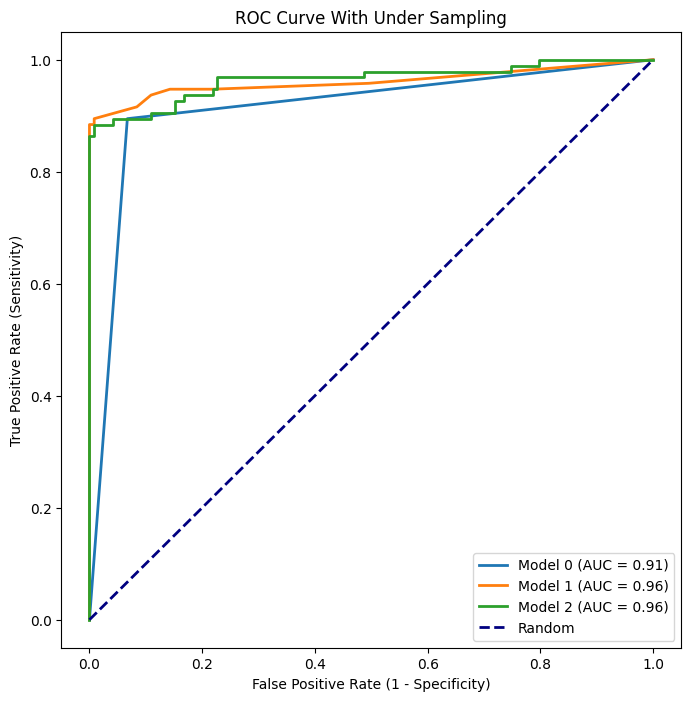

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score, log_loss

# Testing the Results
for i, model in enumerate(models):
    print("\nModel", i)
    y_pred = model.predict(X_test)

    print('\nConfu. Matrix:\n', confusion_matrix(y_test, y_pred))
    print('\nAcc. Score: ', accuracy_score(y_test, y_pred))
    print('\nClass. Report: \n', classification_report(y_test, y_pred))
    print('\nPrecision score: ', precision_score(y_test, y_pred))
    print('Recall score:', recall_score(y_test, y_pred))
    print('f1_score: ', f1_score(y_test, y_pred))
    print('log_loss: ', log_loss(y_test, y_pred))

# Plot ROC curves
plot_roc_curve(models, X_test, y_test)


## Testing all models with Cross_Validation Techniques(with Under Sampling)

[0] DT Cross-Validation AUC: 0.8775158834085065
[1] RF Cross-Validation AUC: 0.9636823641625039
[2] NB Cross-Validation AUC: 0.9576765766202693


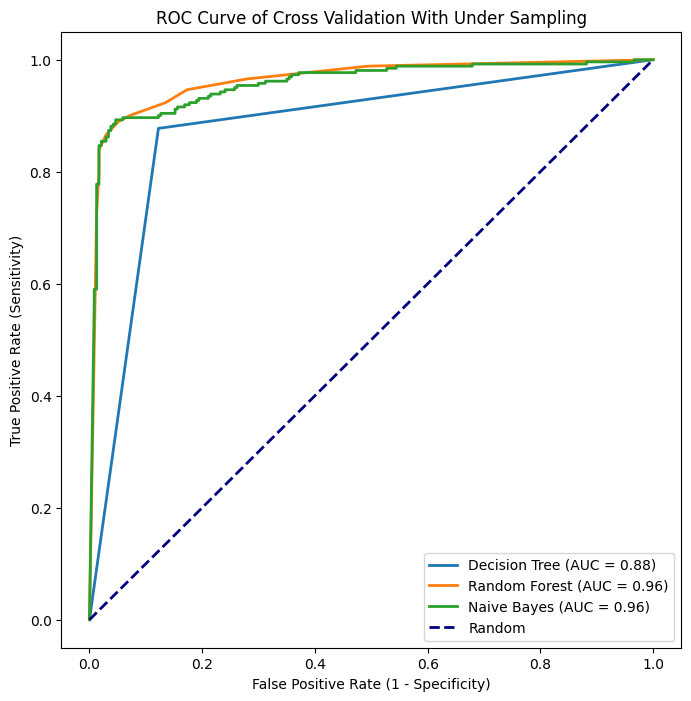

In [70]:
def models_with_crossvalidation_roc(X_train, y_train):
    # Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(random_state=0, criterion="entropy")
    tree_scores = cross_val_score(tree, X_train, y_train, cv=10)  # 10-fold cross-validation
    y_tree_scores = cross_val_predict(tree, X_train, y_train, cv=10, method='predict_proba')
    fpr_tree, tpr_tree, _ = roc_curve(y_train, y_tree_scores[:, 1])
    roc_auc_tree = auc(fpr_tree, tpr_tree)
    print('[0] DT Cross-Validation AUC:', roc_auc_tree)

    # Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(random_state=0, criterion="entropy", n_estimators=10)
    forest_scores = cross_val_score(forest, X_train, y_train, cv=10)  # 10-fold cross-validation
    y_forest_scores = cross_val_predict(forest, X_train, y_train, cv=10, method='predict_proba')
    fpr_forest, tpr_forest, _ = roc_curve(y_train, y_forest_scores[:, 1])
    roc_auc_forest = auc(fpr_forest, tpr_forest)
    print('[1] RF Cross-Validation AUC:', roc_auc_forest)

    # Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb_scores = cross_val_score(gnb, X_train, y_train, cv=10)  # 10-fold cross-validation
    y_gnb_scores = cross_val_predict(gnb, X_train, y_train, cv=10, method='predict_proba')
    fpr_gnb, tpr_gnb, _ = roc_curve(y_train, y_gnb_scores[:, 1])
    roc_auc_gnb = auc(fpr_gnb, tpr_gnb)
    print('[2] NB Cross-Validation AUC:', roc_auc_gnb)

    return tree, forest, gnb, fpr_tree, tpr_tree, roc_auc_tree, fpr_forest, tpr_forest, roc_auc_forest, fpr_gnb, tpr_gnb, roc_auc_gnb

# Train models with cross-validation and ROC curve analysis
tree, forest, gnb, fpr_tree, tpr_tree, roc_auc_tree, fpr_forest, tpr_forest, roc_auc_forest, fpr_gnb, tpr_gnb, roc_auc_gnb = models_with_crossvalidation_roc(X_train, y_train)

# Plot ROC curves
plt.figure(figsize=(8, 8))
plt.plot(fpr_tree, tpr_tree, lw=2, label=f'Decision Tree (AUC = {roc_auc_tree:.2f})')
plt.plot(fpr_forest, tpr_forest, lw=2, label=f'Random Forest (AUC = {roc_auc_forest:.2f})')
plt.plot(fpr_gnb, tpr_gnb, lw=2, label=f'Naive Bayes (AUC = {roc_auc_gnb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve of Cross Validation With Under Sampling')
plt.legend(loc='lower right')
plt.show()


### 2. SMOTE (Synthetics Minority Over Sampling Technique)

In [71]:
X_train_fs.shape,y_train_fs.shape

((199364, 10), (199364,))

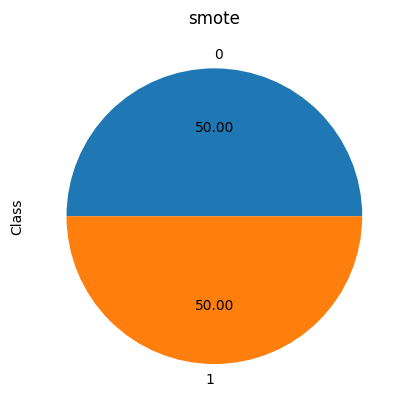

In [72]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote,y_smote = smote.fit_resample(X_train_fs,y_train_fs)
ax = y_smote.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("smote")

In [73]:
y_smote.value_counts()

0    199008
1    199008
Name: Class, dtype: int64

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_smote,y_smote, test_size=0.3, random_state=1)
print("Train shape: ", X_train.shape, y_train.shape)
print("Test shape: ", X_test.shape, y_test.shape)

Train shape:  (278611, 10) (278611,)
Test shape:  (119405, 10) (119405,)


In [75]:
def models(X_train, y_train):

    # Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(random_state=0, criterion="entropy")
    tree.fit(X_train, y_train)

    # Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(random_state=0, criterion="entropy", n_estimators=10)
    forest.fit(X_train, y_train)

    # Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)

    print('[0] DT Accuracy: ', tree.score(X_train, y_train))
    print('[1] RF Accuracy: ', forest.score(X_train, y_train))
    print('[2] NB Accuracy: ', gnb.score(X_train, y_train))

    return tree, forest,gnb

def plot_roc_curve(models, X_test, y_test):
    # Binarize the output
    y_test_bin = label_binarize(y_test, classes=[0, 1])

    # Plot ROC curve for each model
    plt.figure(figsize=(8, 8))
    for i, model in enumerate(models):
        y_score = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test_bin, y_score)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=2, label=f'Model {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('ROC Curve With SMOTE')
    plt.legend(loc='lower right')
    plt.show()

# Train models
models = models(X_train, y_train)

# Plot ROC curves
#plot_roc_curve(models, X_test, y_test)


[0] DT Accuracy:  1.0
[1] RF Accuracy:  0.9999892322987965
[2] NB Accuracy:  0.9123401445025502



Model 0

Confu. Matrix:
 [[59546   192]
 [   88 59579]]

Acc. Score:  0.9976550395712073

Class. Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     59738
           1       1.00      1.00      1.00     59667

    accuracy                           1.00    119405
   macro avg       1.00      1.00      1.00    119405
weighted avg       1.00      1.00      1.00    119405


Precision score:  0.9967877398738518
Recall score: 0.9985251479042017
f1_score:  0.9976556874696495
log_loss:  0.08452094090660213

Model 1

Confu. Matrix:
 [[59703    35]
 [    2 59665]]

Acc. Score:  0.9996901302290524

Class. Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     59738
           1       1.00      1.00      1.00     59667

    accuracy                           1.00    119405
   macro avg       1.00      1.00      1.00    119405
weighted avg       1.00      1.00      1.00    119405

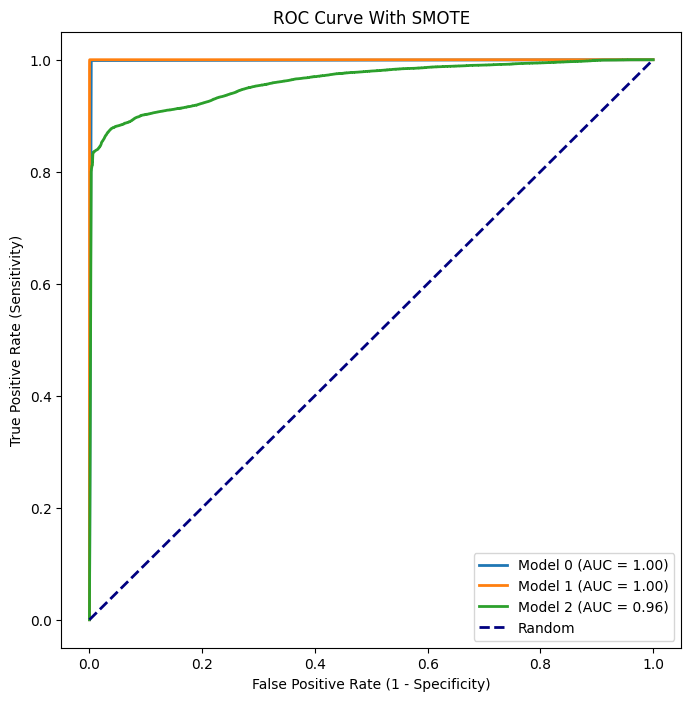

In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score, log_loss

# Testing the Results
for i, model in enumerate(models):
    print("\nModel", i)
    y_pred = model.predict(X_test)

    print('\nConfu. Matrix:\n', confusion_matrix(y_test, y_pred))
    print('\nAcc. Score: ', accuracy_score(y_test, y_pred))
    print('\nClass. Report: \n', classification_report(y_test, y_pred))
    print('\nPrecision score: ', precision_score(y_test, y_pred))
    print('Recall score:', recall_score(y_test, y_pred))
    print('f1_score: ', f1_score(y_test, y_pred))
    print('log_loss: ', log_loss(y_test, y_pred))

# Plot ROC curves
plot_roc_curve(models, X_test, y_test)


# # Testing all models with Cross_Validation Techniques(with SMOTE)

[0] DT Cross-Validation AUC: 0.99750162424718
[1] RF Cross-Validation AUC: 0.9999509546806856
[2] NB Cross-Validation AUC: 0.9607022382254891


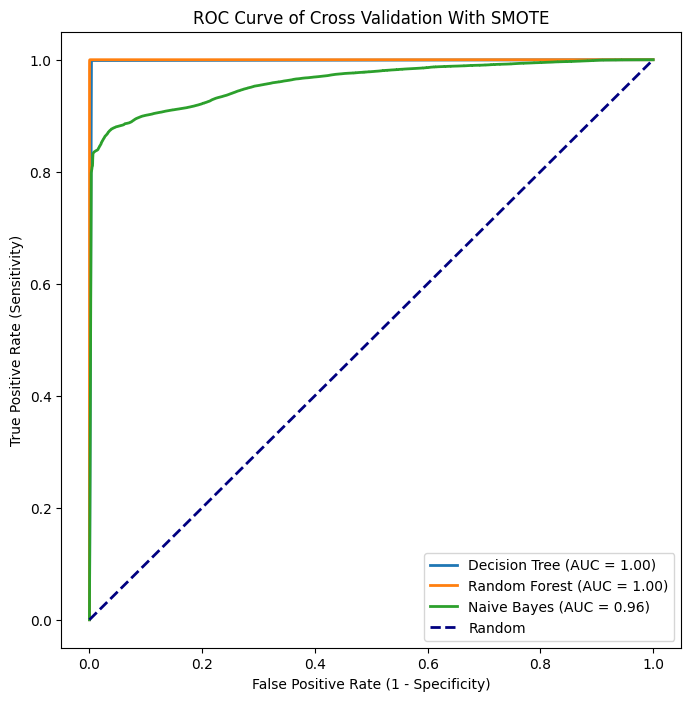

In [77]:
def models_with_crossvalidation_roc(X_train, y_train):
    # Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(random_state=0, criterion="entropy")
    tree_scores = cross_val_score(tree, X_train, y_train, cv=10)  # 10-fold cross-validation
    y_tree_scores = cross_val_predict(tree, X_train, y_train, cv=10, method='predict_proba')
    fpr_tree, tpr_tree, _ = roc_curve(y_train, y_tree_scores[:, 1])
    roc_auc_tree = auc(fpr_tree, tpr_tree)
    print('[0] DT Cross-Validation AUC:', roc_auc_tree)

    # Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(random_state=0, criterion="entropy", n_estimators=10)
    forest_scores = cross_val_score(forest, X_train, y_train, cv=10)  # 10-fold cross-validation
    y_forest_scores = cross_val_predict(forest, X_train, y_train, cv=10, method='predict_proba')
    fpr_forest, tpr_forest, _ = roc_curve(y_train, y_forest_scores[:, 1])
    roc_auc_forest = auc(fpr_forest, tpr_forest)
    print('[1] RF Cross-Validation AUC:', roc_auc_forest)

    # Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb_scores = cross_val_score(gnb, X_train, y_train, cv=10)  # 10-fold cross-validation
    y_gnb_scores = cross_val_predict(gnb, X_train, y_train, cv=10, method='predict_proba')
    fpr_gnb, tpr_gnb, _ = roc_curve(y_train, y_gnb_scores[:, 1])
    roc_auc_gnb = auc(fpr_gnb, tpr_gnb)
    print('[2] NB Cross-Validation AUC:', roc_auc_gnb)


    return tree, forest, gnb, fpr_tree, tpr_tree, roc_auc_tree, fpr_forest, tpr_forest, roc_auc_forest, fpr_gnb, tpr_gnb, roc_auc_gnb

# Train models with cross-validation and ROC curve analysis
tree, forest, gnb, fpr_tree, tpr_tree, roc_auc_tree, fpr_forest, tpr_forest, roc_auc_forest, fpr_gnb, tpr_gnb, roc_auc_gnb = models_with_crossvalidation_roc(X_train, y_train)

# Plot ROC curves
plt.figure(figsize=(8, 8))
plt.plot(fpr_tree, tpr_tree, lw=2, label=f'Decision Tree (AUC = {roc_auc_tree:.2f})')
plt.plot(fpr_forest, tpr_forest, lw=2, label=f'Random Forest (AUC = {roc_auc_forest:.2f})')
plt.plot(fpr_gnb, tpr_gnb, lw=2, label=f'Naive Bayes (AUC = {roc_auc_gnb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve of Cross Validation With SMOTE')
plt.legend(loc='lower right')
plt.show()


### 3. ClusterCentroid (Under Sampling)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



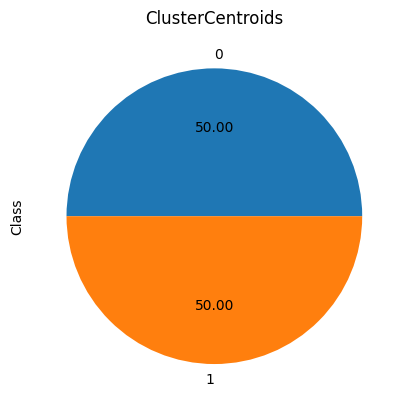

In [78]:
from imblearn.under_sampling import ClusterCentroids
cluster = ClusterCentroids()
X_cluster,y_cluster = cluster.fit_resample(X_train_fs,y_train_fs)
ax = y_cluster.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("ClusterCentroids")

In [79]:
from sklearn.cluster import KMeans

# Explicitly set n_init to suppress the warning
kmeans = KMeans(n_clusters=3, n_init=200000)  # You can adjust the value of n_init as needed


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [80]:
y_cluster.value_counts()

0    356
1    356
Name: Class, dtype: int64

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_cluster,y_cluster, test_size=0.3, random_state=42)
print("Train shape: ", X_train.shape, y_train.shape)
print("Test shape: ", X_test.shape, y_test.shape)

Train shape:  (498, 10) (498,)
Test shape:  (214, 10) (214,)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# 356+356 = 712 and 498+498 = 712 correct

In [82]:
def models(X_train, y_train):

    # Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(random_state=0, criterion="entropy")
    tree.fit(X_train, y_train)

    # Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(random_state=0, criterion="entropy", n_estimators=10)
    forest.fit(X_train, y_train)

    # Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)

    print('[0] DT Accuracy: ', tree.score(X_train, y_train))
    print('[1] RF Accuracy: ', forest.score(X_train, y_train))
    print('[2] NB Accuracy: ', gnb.score(X_train, y_train))

    return tree, forest,gnb

def plot_roc_curve(models, X_test, y_test):
    # Binarize the output
    y_test_bin = label_binarize(y_test, classes=[0, 1])

    # Plot ROC curve for each model
    plt.figure(figsize=(8, 8))
    for i, model in enumerate(models):
        y_score = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test_bin, y_score)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=2, label=f'Model {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('ROC Curve With Cluster Centroid')
    plt.legend(loc='lower right')
    plt.show()

# Train models
models = models(X_train, y_train)

# Plot ROC curves
#plot_roc_curve(models, X_test, y_test)


[0] DT Accuracy:  1.0
[1] RF Accuracy:  0.9899598393574297
[2] NB Accuracy:  0.8674698795180723


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




Model 0

Confu. Matrix:
 [[107  12]
 [ 13  82]]

Acc. Score:  0.883177570093458

Class. Report: 
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       119
           1       0.87      0.86      0.87        95

    accuracy                           0.88       214
   macro avg       0.88      0.88      0.88       214
weighted avg       0.88      0.88      0.88       214


Precision score:  0.8723404255319149
Recall score: 0.8631578947368421
f1_score:  0.8677248677248677
log_loss:  4.2107071716258355

Model 1

Confu. Matrix:
 [[112   7]
 [ 12  83]]

Acc. Score:  0.9112149532710281

Class. Report: 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       119
           1       0.92      0.87      0.90        95

    accuracy                           0.91       214
   macro avg       0.91      0.91      0.91       214
weighted avg       0.91      0.91      0.91       214


Precision score

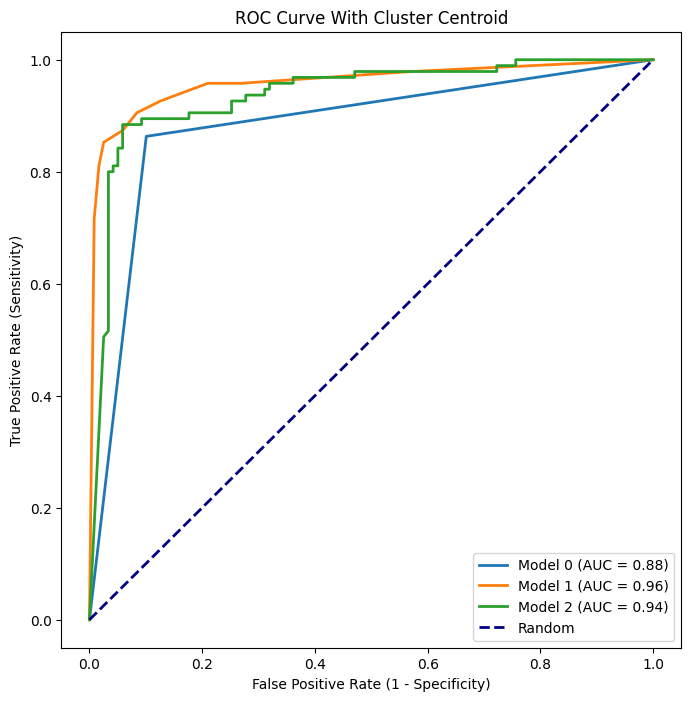

In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score, log_loss

# Testing the Results
for i, model in enumerate(models):
    print("\nModel", i)
    y_pred = model.predict(X_test)

    print('\nConfu. Matrix:\n', confusion_matrix(y_test, y_pred))
    print('\nAcc. Score: ', accuracy_score(y_test, y_pred))
    print('\nClass. Report: \n', classification_report(y_test, y_pred))
    print('\nPrecision score: ', precision_score(y_test, y_pred))
    print('Recall score:', recall_score(y_test, y_pred))
    print('f1_score: ', f1_score(y_test, y_pred))
    print('log_loss: ', log_loss(y_test, y_pred))

# Plot ROC curves
plot_roc_curve(models, X_test, y_test)


## Testing all models with Cross_Validation Techniques(with ClusterCentroid)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[0] DT Cross-Validation AUC: 0.8585285416363547
[1] RF Cross-Validation AUC: 0.9448243529430783
[2] NB Cross-Validation AUC: 0.9369675218649465


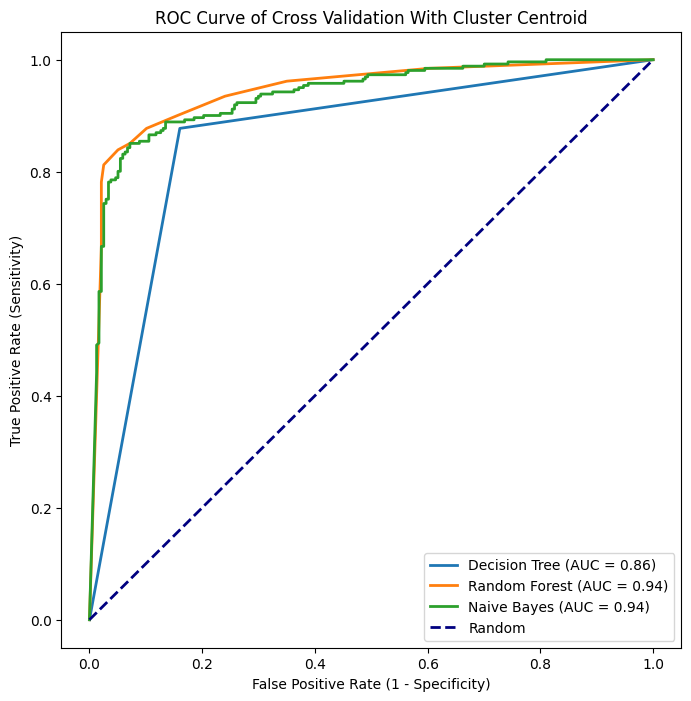

In [84]:
def models_with_crossvalidation_roc(X_train, y_train):
    # Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(random_state=0, criterion="entropy")
    tree_scores = cross_val_score(tree, X_train, y_train, cv=10)  # 10-fold cross-validation
    y_tree_scores = cross_val_predict(tree, X_train, y_train, cv=10, method='predict_proba')
    fpr_tree, tpr_tree, _ = roc_curve(y_train, y_tree_scores[:, 1])
    roc_auc_tree = auc(fpr_tree, tpr_tree)
    print('[0] DT Cross-Validation AUC:', roc_auc_tree)

    # Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(random_state=0, criterion="entropy", n_estimators=10)
    forest_scores = cross_val_score(forest, X_train, y_train, cv=10)  # 10-fold cross-validation
    y_forest_scores = cross_val_predict(forest, X_train, y_train, cv=10, method='predict_proba')
    fpr_forest, tpr_forest, _ = roc_curve(y_train, y_forest_scores[:, 1])
    roc_auc_forest = auc(fpr_forest, tpr_forest)
    print('[1] RF Cross-Validation AUC:', roc_auc_forest)

    # Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb_scores = cross_val_score(gnb, X_train, y_train, cv=10)  # 10-fold cross-validation
    y_gnb_scores = cross_val_predict(gnb, X_train, y_train, cv=10, method='predict_proba')
    fpr_gnb, tpr_gnb, _ = roc_curve(y_train, y_gnb_scores[:, 1])
    roc_auc_gnb = auc(fpr_gnb, tpr_gnb)
    print('[2] NB Cross-Validation AUC:', roc_auc_gnb)


    return tree, forest, gnb, fpr_tree, tpr_tree, roc_auc_tree, fpr_forest, tpr_forest, roc_auc_forest, fpr_gnb, tpr_gnb, roc_auc_gnb

# Train models with cross-validation and ROC curve analysis
tree, forest, gnb, fpr_tree, tpr_tree, roc_auc_tree, fpr_forest, tpr_forest, roc_auc_forest, fpr_gnb, tpr_gnb, roc_auc_gnb = models_with_crossvalidation_roc(X_train, y_train)

# Plot ROC curves
plt.figure(figsize=(8, 8))
plt.plot(fpr_tree, tpr_tree, lw=2, label=f'Decision Tree (AUC = {roc_auc_tree:.2f})')
plt.plot(fpr_forest, tpr_forest, lw=2, label=f'Random Forest (AUC = {roc_auc_forest:.2f})')
plt.plot(fpr_gnb, tpr_gnb, lw=2, label=f'Naive Bayes (AUC = {roc_auc_gnb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve of Cross Validation With Cluster Centroid')
plt.legend(loc='lower right')
plt.show()

### 4. SVMSMOTE ( Over Sampling)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



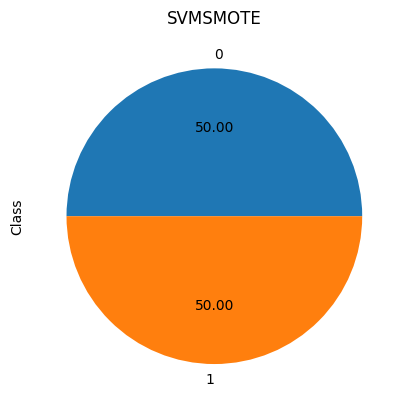

In [85]:
from imblearn.over_sampling import SVMSMOTE
svmsmote = SVMSMOTE()# float
X_svmsmote,y_svmsmote = svmsmote.fit_resample(X_train_fs,y_train_fs)
ax = y_svmsmote.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("SVMSMOTE")

In [86]:
y_svmsmote.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0    199008
1    199008
Name: Class, dtype: int64

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_svmsmote,y_svmsmote, test_size=0.3, random_state=1)
print("Train shape: ", X_train.shape, y_train.shape)
print("Test shape: ", X_test.shape, y_test.shape)

Train shape:  (278611, 10) (278611,)
Test shape:  (119405, 10) (119405,)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [88]:
# 199008+199008 = 278611+119405 correct

In [89]:
def models(X_train, y_train):

    # Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(random_state=0, criterion="entropy")
    tree.fit(X_train, y_train)

    # Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(random_state=0, criterion="entropy", n_estimators=10)
    forest.fit(X_train, y_train)

    # Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)

    print('[0] DT Accuracy: ', tree.score(X_train, y_train))
    print('[1] RF Accuracy: ', forest.score(X_train, y_train))
    print('[2] NB Accuracy: ', gnb.score(X_train, y_train))

    return tree, forest,gnb

def plot_roc_curve(models, X_test, y_test):
    # Binarize the output
    y_test_bin = label_binarize(y_test, classes=[0, 1])

    # Plot ROC curve for each model
    plt.figure(figsize=(8, 8))
    for i, model in enumerate(models):
        y_score = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test_bin, y_score)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=2, label=f'Model {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('ROC Curve With SVMSMOTE')
    plt.legend(loc='lower right')
    plt.show()

# Train models
models = models(X_train, y_train)

# Plot ROC curves
#plot_roc_curve(models, X_test, y_test)


[0] DT Accuracy:  1.0
[1] RF Accuracy:  0.9999569291951861
[2] NB Accuracy:  0.9644773537297522



Model 0

Confu. Matrix:
 [[59702    36]
 [   18 59649]]

Acc. Score:  0.99954775763159


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




Class. Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     59738
           1       1.00      1.00      1.00     59667

    accuracy                           1.00    119405
   macro avg       1.00      1.00      1.00    119405
weighted avg       1.00      1.00      1.00    119405


Precision score:  0.9993968333752199
Recall score: 0.9996983257076776
f1_score:  0.9995475568067564
log_loss:  0.01630046717484488

Model 1

Confu. Matrix:
 [[59721    17]
 [   17 59650]]

Acc. Score:  0.9997152548050752

Class. Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     59738
           1       1.00      1.00      1.00     59667

    accuracy                           1.00    119405
   macro avg       1.00      1.00      1.00    119405
weighted avg       1.00      1.00      1.00    119405


Precision score:  0.9997150853905844
Recall score: 0.9997150853905844
f1_score:  0.9997

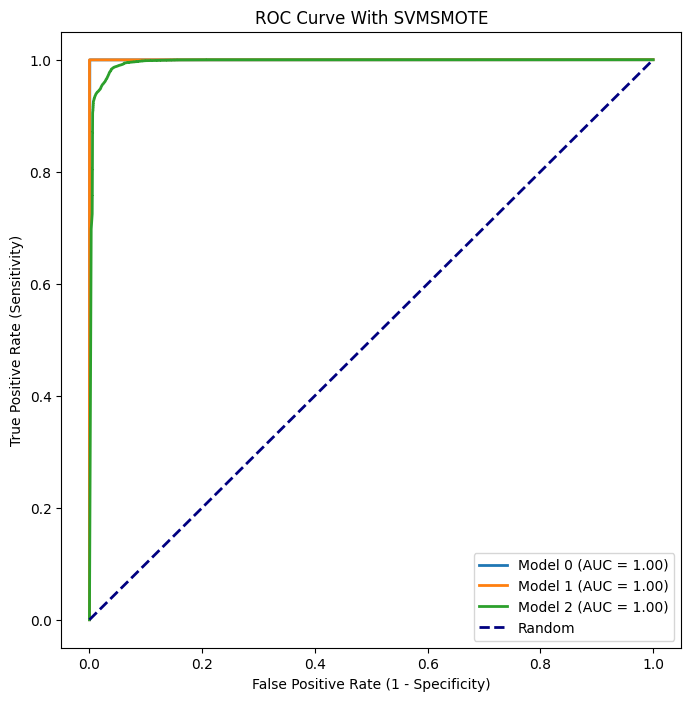

In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score, log_loss

# Testing the Results
for i, model in enumerate(models):
    print("\nModel", i)
    y_pred = model.predict(X_test)

    print('\nConfu. Matrix:\n', confusion_matrix(y_test, y_pred))
    print('\nAcc. Score: ', accuracy_score(y_test, y_pred))
    print('\nClass. Report: \n', classification_report(y_test, y_pred))
    print('\nPrecision score: ', precision_score(y_test, y_pred))
    print('Recall score:', recall_score(y_test, y_pred))
    print('f1_score: ', f1_score(y_test, y_pred))
    print('log_loss: ', log_loss(y_test, y_pred))

# Plot ROC curves
plot_roc_curve(models, X_test, y_test)


## Testing all models with Cross_Validation Techniques(with SVMSMOTE)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[0] DT Cross-Validation AUC: 0.999565659700688
[1] RF Cross-Validation AUC: 0.9998486318246587
[2] NB Cross-Validation AUC: 0.9952298096984391


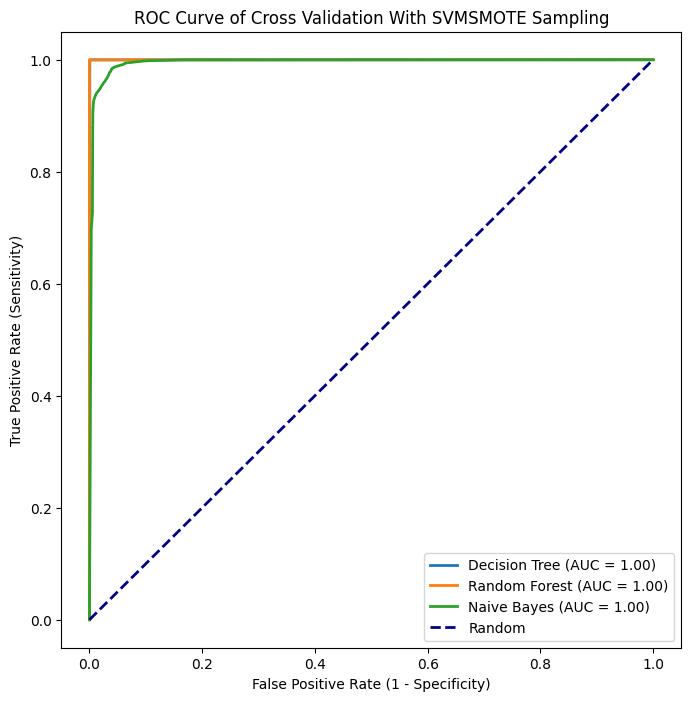

In [91]:
def models_with_crossvalidation_roc(X_train, y_train):
    # Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(random_state=0, criterion="entropy")
    tree_scores = cross_val_score(tree, X_train, y_train, cv=10)  # 10-fold cross-validation
    y_tree_scores = cross_val_predict(tree, X_train, y_train, cv=10, method='predict_proba')
    fpr_tree, tpr_tree, _ = roc_curve(y_train, y_tree_scores[:, 1])
    roc_auc_tree = auc(fpr_tree, tpr_tree)
    print('[0] DT Cross-Validation AUC:', roc_auc_tree)

    # Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(random_state=0, criterion="entropy", n_estimators=10)
    forest_scores = cross_val_score(forest, X_train, y_train, cv=10)  # 10-fold cross-validation
    y_forest_scores = cross_val_predict(forest, X_train, y_train, cv=10, method='predict_proba')
    fpr_forest, tpr_forest, _ = roc_curve(y_train, y_forest_scores[:, 1])
    roc_auc_forest = auc(fpr_forest, tpr_forest)
    print('[1] RF Cross-Validation AUC:', roc_auc_forest)

    # Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb_scores = cross_val_score(gnb, X_train, y_train, cv=10)  # 10-fold cross-validation
    y_gnb_scores = cross_val_predict(gnb, X_train, y_train, cv=10, method='predict_proba')
    fpr_gnb, tpr_gnb, _ = roc_curve(y_train, y_gnb_scores[:, 1])
    roc_auc_gnb = auc(fpr_gnb, tpr_gnb)
    print('[2] NB Cross-Validation AUC:', roc_auc_gnb)


    return tree, forest, gnb, fpr_tree, tpr_tree, roc_auc_tree, fpr_forest, tpr_forest, roc_auc_forest, fpr_gnb, tpr_gnb, roc_auc_gnb

# Train models with cross-validation and ROC curve analysis
tree, forest, gnb, fpr_tree, tpr_tree, roc_auc_tree, fpr_forest, tpr_forest, roc_auc_forest, fpr_gnb, tpr_gnb, roc_auc_gnb = models_with_crossvalidation_roc(X_train, y_train)

# Plot ROC curves
plt.figure(figsize=(8, 8))
plt.plot(fpr_tree, tpr_tree, lw=2, label=f'Decision Tree (AUC = {roc_auc_tree:.2f})')
plt.plot(fpr_forest, tpr_forest, lw=2, label=f'Random Forest (AUC = {roc_auc_forest:.2f})')
plt.plot(fpr_gnb, tpr_gnb, lw=2, label=f'Naive Bayes (AUC = {roc_auc_gnb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve of Cross Validation With SVMSMOTE Sampling')
plt.legend(loc='lower right')
plt.show()

### Hybrid Sampling

### 6. SMOTE+TL

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



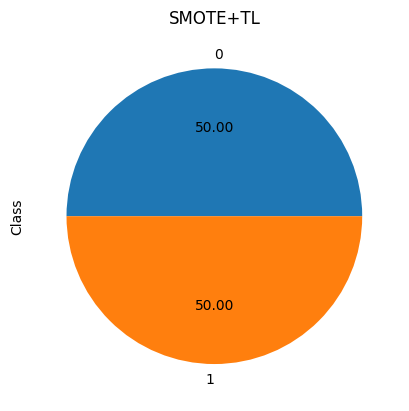

In [92]:
from imblearn.combine import SMOTETomek
smotetl = SMOTETomek()
X_smotetl,y_smotetl = smotetl.fit_resample(X_train_fs,y_train_fs)
ax = y_smotetl.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("SMOTE+TL")

In [93]:
y_smotetl.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0    199008
1    199008
Name: Class, dtype: int64

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_smotetl,y_smotetl, test_size=0.3, random_state=42)
print("Train shape: ", X_train.shape, y_train.shape)
print("Test shape: ", X_test.shape, y_test.shape)

Train shape:  (278611, 10) (278611,)
Test shape:  (119405, 10) (119405,)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# 199008+199008 = 278611+119405 correct

In [95]:
def models(X_train, y_train):

    # Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(random_state=0, criterion="entropy")
    tree.fit(X_train, y_train)

    # Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(random_state=0, criterion="entropy", n_estimators=10)
    forest.fit(X_train, y_train)

    # Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)

    print('[0] DT Accuracy: ', tree.score(X_train, y_train))
    print('[1] RF Accuracy: ', forest.score(X_train, y_train))
    print('[2] NB Accuracy: ', gnb.score(X_train, y_train))

    return tree, forest,gnb

def plot_roc_curve(models, X_test, y_test):
    # Binarize the output
    y_test_bin = label_binarize(y_test, classes=[0, 1])

    # Plot ROC curve for each model
    plt.figure(figsize=(8, 8))
    for i, model in enumerate(models):
        y_score = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test_bin, y_score)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=2, label=f'Model {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('ROC Curve With SMOTE+TL')
    plt.legend(loc='lower right')
    plt.show()

# Train models
models = models(X_train, y_train)

# Plot ROC curves
#plot_roc_curve(models, X_test, y_test)


[0] DT Accuracy:  1.0
[1] RF Accuracy:  0.999985643065062
[2] NB Accuracy:  0.913298469909659



Model 0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




Confu. Matrix:
 [[59493   199]
 [   69 59644]]

Acc. Score:  0.9977555378752984

Class. Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     59692
           1       1.00      1.00      1.00     59713

    accuracy                           1.00    119405
   macro avg       1.00      1.00      1.00    119405
weighted avg       1.00      1.00      1.00    119405


Precision score:  0.996674631953612
Recall score: 0.9988444727278817
f1_score:  0.9977583726454549
log_loss:  0.08089861486774777

Model 1

Confu. Matrix:
 [[59664    28]
 [    2 59711]]

Acc. Score:  0.9997487542397722

Class. Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     59692
           1       1.00      1.00      1.00     59713

    accuracy                           1.00    119405
   macro avg       1.00      1.00      1.00    119405
weighted avg       1.00      1.00      1.00    119405


Precisi

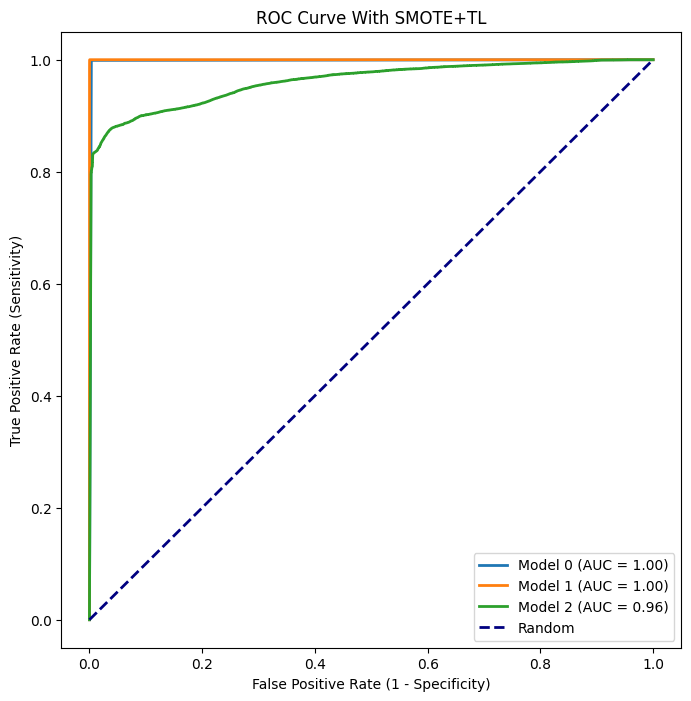

In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score, log_loss

# Testing the Results
for i, model in enumerate(models):
    print("\nModel", i)
    y_pred = model.predict(X_test)

    print('\nConfu. Matrix:\n', confusion_matrix(y_test, y_pred))
    print('\nAcc. Score: ', accuracy_score(y_test, y_pred))
    print('\nClass. Report: \n', classification_report(y_test, y_pred))
    print('\nPrecision score: ', precision_score(y_test, y_pred))
    print('Recall score:', recall_score(y_test, y_pred))
    print('f1_score: ', f1_score(y_test, y_pred))
    print('log_loss: ', log_loss(y_test, y_pred))

# Plot ROC curves
plot_roc_curve(models, X_test, y_test)


### Testing all models with Cross_Validation Techniques(SMOTE+TL)

[0] DT Cross-Validation AUC: 0.9975522307734428
[1] RF Cross-Validation AUC: 0.9999508561574758
[2] NB Cross-Validation AUC: 0.9606774133385487


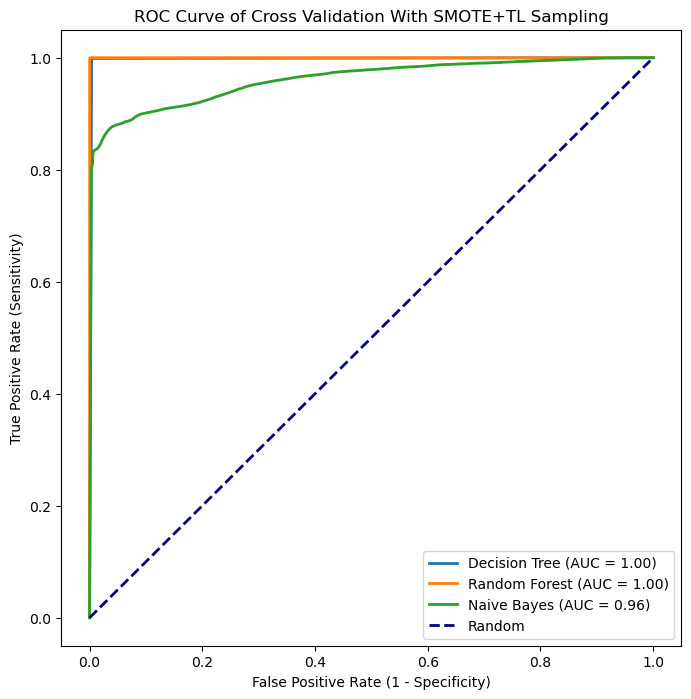

In [ ]:
def models_with_crossvalidation_roc(X_train, y_train):
    # Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(random_state=0, criterion="entropy")
    tree_scores = cross_val_score(tree, X_train, y_train, cv=10)  # 10-fold cross-validation
    y_tree_scores = cross_val_predict(tree, X_train, y_train, cv=10, method='predict_proba')
    fpr_tree, tpr_tree, _ = roc_curve(y_train, y_tree_scores[:, 1])
    roc_auc_tree = auc(fpr_tree, tpr_tree)
    print('[0] DT Cross-Validation AUC:', roc_auc_tree)

    # Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(random_state=0, criterion="entropy", n_estimators=10)
    forest_scores = cross_val_score(forest, X_train, y_train, cv=10)  # 10-fold cross-validation
    y_forest_scores = cross_val_predict(forest, X_train, y_train, cv=10, method='predict_proba')
    fpr_forest, tpr_forest, _ = roc_curve(y_train, y_forest_scores[:, 1])
    roc_auc_forest = auc(fpr_forest, tpr_forest)
    print('[1] RF Cross-Validation AUC:', roc_auc_forest)

    # Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb_scores = cross_val_score(gnb, X_train, y_train, cv=10)  # 10-fold cross-validation
    y_gnb_scores = cross_val_predict(gnb, X_train, y_train, cv=10, method='predict_proba')
    fpr_gnb, tpr_gnb, _ = roc_curve(y_train, y_gnb_scores[:, 1])
    roc_auc_gnb = auc(fpr_gnb, tpr_gnb)
    print('[2] NB Cross-Validation AUC:', roc_auc_gnb)


    return tree, forest, gnb, fpr_tree, tpr_tree, roc_auc_tree, fpr_forest, tpr_forest, roc_auc_forest, fpr_gnb, tpr_gnb, roc_auc_gnb

# Train models with cross-validation and ROC curve analysis
tree, forest, gnb, fpr_tree, tpr_tree, roc_auc_tree, fpr_forest, tpr_forest, roc_auc_forest, fpr_gnb, tpr_gnb, roc_auc_gnb = models_with_crossvalidation_roc(X_train, y_train)

# Plot ROC curves
plt.figure(figsize=(8, 8))
plt.plot(fpr_tree, tpr_tree, lw=2, label=f'Decision Tree (AUC = {roc_auc_tree:.2f})')
plt.plot(fpr_forest, tpr_forest, lw=2, label=f'Random Forest (AUC = {roc_auc_forest:.2f})')
plt.plot(fpr_gnb, tpr_gnb, lw=2, label=f'Naive Bayes (AUC = {roc_auc_gnb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve of Cross Validation With SMOTE+TL Sampling')
plt.legend(loc='lower right')
plt.show()